In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

#### define sample size

In [3]:
s=10000

#### Define rare disaster rate

In [4]:
r_disaster_rate = 0.02

#### Simulate ϵ with 10000 random draws from a standard normal distribution

In [5]:
epsilon = np.random.randn(s)
epsilon

array([-0.41472576, -0.60666849,  0.30840325, ..., -1.3349049 ,
       -2.32079997,  0.39763373])

####  Simulate $\nu$ with 10000 random draws from a standard uniform distribution

In [6]:
mu=np.random.uniform(0,1,s)

In [7]:
mu

array([0.33282713, 0.77196494, 0.746882  , ..., 0.13672004, 0.29924804,
       0.7974529 ])

#### Rare disaster $\nu$ has value of either zero (probability 98.3%) or ln(0.65) (with probability 1.7%)


In [8]:
n = []
val = np.log(0.7)
for i in mu:
    if i <= r_disaster_rate:
        n.append(val)
    else:
        n.append(0.0)
      

In [9]:
nu_values = np.array(n)
nu_values

array([0., 0., 0., ..., 0., 0., 0.])

#### there should be around 170 with value ln(0.7)

### consumption growth has a lognormal distribution with the possibility of rare disasters:

## $\ln$$g̃$ =0.02+0.02$ϵ̃$ +$ν̃$ 

### Define $g̃$ value

In [10]:
g = []
for i in np.arange(0, s):
    g_val = np.exp(0.02 + 0.02 * epsilon[i] + nu_values[i])
    g.append(g_val)

In [11]:
G = np.array(g)

In [12]:
G

array([1.01177426, 1.00789765, 1.02651345, ..., 0.99332428, 0.97392985,
       1.02834702])

### Calculate utility of financial gain or loss $ν̃$ and Calculate the equilibrium values of x for b0 in the range [0, 10], in increments of 0.1, using an iterative procedure known as bisection search

In [13]:
import statistics

In [14]:
def myex(b0,x):
    nu=[]
    global G
    R=x*G;
    n=len(R);
    for i in range(0,n):
        if(R[i]>=1.0303):
            v=R[i]-1.0303;
            nu.append(v)
        else:
            k=2*(R[i]-1.0303);
            nu.append(k)
            
    return 0.99*b0*statistics.mean(nu)+0.99*x-1;
    

In [15]:
def mybisection(b0):
    a=1;
    b=1.1;
    signa=-1; # when x=1, the value is negative;
    signb=1;  # when x=1.1, the value is positive;
    x=(a+b)/2;
    ex=myex(b0,x)
    while(abs(ex)>=0.00001):
        if (ex*signb>0):
            b=x;
        else:
            a=x; 
        x=(a+b)/2;
        ex=myex(b0,x);
    return x

In [16]:
b0=np.arange(0,10,0.1)

In [17]:
x=[]
for i in b0:
    x.append(mybisection(i))

In [18]:
X = np.array(x)

### Use x to calculate the price-dividend ratio for the market portfolio:

In [19]:
price_dividend_ratio=1/(X-1)

Text(0, 0.5, 'price_dividend_ratio')

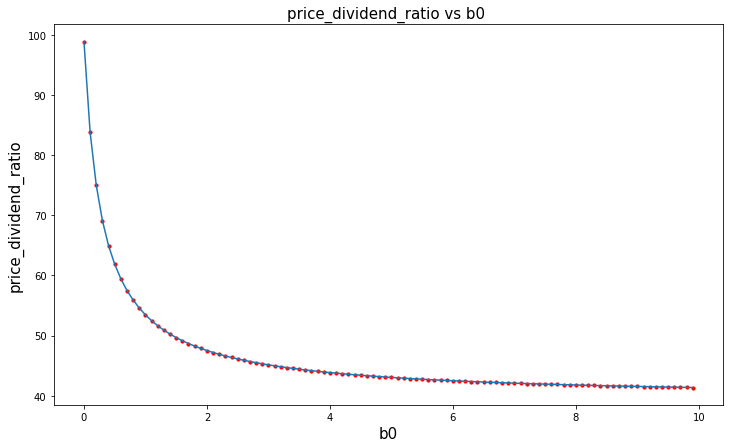

In [20]:
plt.figure(figsize=(12,7))
plt.plot(b0, price_dividend_ratio)
plt.scatter(b0, price_dividend_ratio, s=10, c='r')
plt.title('price_dividend_ratio vs b0 ',fontsize=15)
plt.xlabel('b0', fontsize=15)
plt.ylabel('price_dividend_ratio', fontsize=15)

### calculate the expected market return

In [21]:
#expected market return
Rm=[]
for i in np.arange(0,100):
    R_m=X[i]*G.mean()
    Rm.append(R_m)

In [22]:
Expected_Market_Return=np.array(Rm)

In [23]:
#Calculate equity premium
Equity_Premium = Expected_Market_Return-1.0303

Text(0, 0.5, 'Equity_Premium')

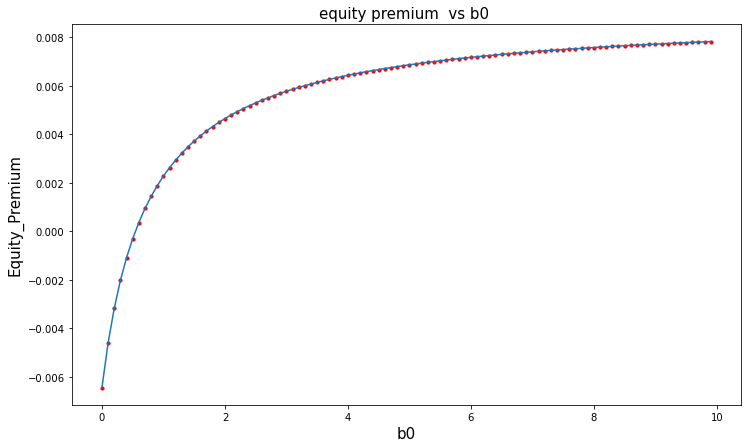

In [24]:
plt.figure(figsize=(12,7))
plt.plot(b0, Equity_Premium)
plt.scatter(b0, Equity_Premium, s=10, c='r')
plt.title('equity premium  vs b0 ',fontsize=15)
plt.xlabel('b0', fontsize=15)
plt.ylabel('Equity_Premium', fontsize=15)